# Detailed Work Plan

## 1. Research Objectives
**Primary Goal**: Analyze hospital patient pathways using process mining techniques enriched with context-aware variant analysis and customized evaluation metrics.
Sub-Objectives:

* Discover baseline hospital care pathways using standard process mining techniques.
* Implement variant-aware analysis by segmenting patients based on demographic and clinical features.
* Develop and apply a custom generalization metric that accounts for trace importance, following a methodology inspired by weighted fitness calculation.
* Analyze how model completeness and generalization vary between different sampling or segmentation strategies.

## 2. Research Questions
* How well can standard process mining techniques capture real hospital patient pathways?
* How does the inclusion of context-based variant evaluation improve the interpretability of hospital processes?
* How effective is the custom generalization metric in evaluating the robustness and reliability of process models?
* What improvements to hospital operations can be suggested based on the findings?

## 3. Evaluation Metrics

1) Contextual Fitness --  Standard fitness adjusted with variant-level importance (optional, if time permits). <br>
2) Custom Generalization -- New metric measuring model generalization with consideration of variant significance. <br>
3) Precision -- How much the model avoids overgeneralizing behaviors not present in the data. <br>
4) Completeness -- How well the log covers the actual hospital care process (via entropy or coverage-based estimators). <br>

## 4. Workflow Overview
**A. Dataset: Hospital_log.xes** <br>
* Structured event log representing hospital care events.
* Each patient = a case; each event = a clinical activity.  <br> <br>

**B. Phase 1: Baseline Process Discovery**  <br>
* Load the event log into PM4Py.
* Discover the control-flow model (Petri Net) using the Inductive Miner.
Evaluate using standard fitness, precision, and generalization metrics.  <br> <br>

**C. Phase 2: Context-Aware Variant Analysis**  <br>
* Define variant groups based on clinical attributes (e.g., age group, diagnosis type, urgency).
* Generate multiple event logs by filtering cases according to variant definitions.
+ * Rediscover models per variant group.
Compare structural differences and performance across variant-specific models.  <br> <br>

**D. Phase 3: Custom Generalization Metric Development**  <br>
* Implement a weighted generalization function:
* Based on the importance of each trace (similar to weighted fitness).
* Simulate traces from models.
* Measure how well the model generalizes to unseen but plausible traces.
* Apply the custom metric to baseline and variant-specific models.

**E. Phase 4: Analysis and Visualization** <br>
* Visualize discovered models (Petri nets) for both baseline and variant models.
* Visualize trace variant distributions (e.g., Directly Follows Graphs, Variants Statistics).
* Compare how generalization, completeness, and precision change between variants.
* Plot relationships between log completeness and generalization quality.

**F. Phase 5: Conclusions** <br>
* Summarize key findings:
* How care processes vary across different patient groups.
* How different levels of completeness and context impact model generalization.
* Suggest practical improvements for hospital operations based on discovered bottlenecks and pathway deviations.


## 5. Expected Contributions
* Development of a context-aware process analysis framework.
* Creation of a custom generalization metric that can be reused in future research.
* Deep insights into hospital care pathways and their variability.
* Recommendations for optimizing patient treatment flows based on evidence from real data.


In [107]:
# !pip install pm4py

In [1]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
from sympy import false
from xarray.util.generate_ops import inplace

# Basic dataset analysis: Hospital_log.xes

In [2]:
# Convert the XES file to CSV
log = pm4py.read_xes('data/Hospital_log.xes')
df = pm4py.convert_to_dataframe(log)

/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/1143 [00:00<?, ?it/s]

/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_da

In [3]:
# View the first 5 rows of Dataframe
df.head()

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:Treatment code:14,case:Treatment code:15,case:Diagnosis:15,case:Diagnosis:14,case:Diagnosis:11,case:Diagnosis:13,case:Diagnosis:12,case:Diagnosis code:14,case:Diagnosis code:13,case:Diagnosis code:15
0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-02 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-02 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-04 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Obstetrics & Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-04 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-04 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["timestamp"] = pd.to_datetime(df["time:timestamp"])
df.head()

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:Treatment code:15,case:Diagnosis:15,case:Diagnosis:14,case:Diagnosis:11,case:Diagnosis:13,case:Diagnosis:12,case:Diagnosis code:14,case:Diagnosis code:13,case:Diagnosis code:15,timestamp
0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-02 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-02 23:00:00+00:00
1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-02 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-02 23:00:00+00:00
2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-04 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-04 23:00:00+00:00
3,Obstetrics & Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-04 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-04 23:00:00+00:00
4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-04 23:00:00+00:00,complete,2006-01-04 22:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-04 23:00:00+00:00


In [5]:
# Basic information about dataset
print(f"Total number of events: {len(df)}")
print(f"Number of unique cases: {df['case:concept:name'].nunique()}")

Total number of events: 150291
Number of unique cases: 1143


In [6]:
# Columns
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")

1. org:group
2. Number of executions
3. Specialism code
4. concept:name
5. Producer code
6. Section
7. Activity code
8. time:timestamp
9. lifecycle:transition
10. case:End date
11. case:Age
12. case:Treatment code:2
13. case:Treatment code:1
14. case:Diagnosis code:2
15. case:Specialism code
16. case:Diagnosis code:1
17. case:Treatment code
18. case:Diagnosis:2
19. case:Diagnosis:1
20. case:Diagnosis
21. case:Diagnosis Treatment Combination ID
22. case:Start date
23. case:Diagnosis Treatment Combination ID:2
24. case:Diagnosis code
25. case:Diagnosis Treatment Combination ID:1
26. case:concept:name
27. case:Start date:1
28. case:End date:1
29. case:End date:2
30. case:Specialism code:1
31. case:Start date:2
32. case:Specialism code:2
33. case:Age:1
34. case:Age:2
35. case:Treatment code:3
36. case:Age:3
37. case:Diagnosis code:3
38. case:Diagnosis:3
39. case:Diagnosis Treatment Combination ID:3
40. case:Specialism code:3
41. case:Start date:3
42. case:Treatment code:4
43. case:Diagnosi

In [7]:
# General table of null values
missing_data = df.isnull().sum().to_frame(name='Number of empty data')
missing_data['% empty data'] = (missing_data['Number of empty data'] / len(df)) * 100
missing_data = missing_data.sort_values('% empty data', ascending=False)

In [8]:
print("\n Ranking by the amount of missing data:")
print(missing_data)


 Ranking by the amount of missing data:
                         Number of empty data  % empty data
case:Age:5                             149939     99.765788
case:Treatment code:11                 149500     99.473688
case:End date:14                       149500     99.473688
case:Specialism code:12                149500     99.473688
case:Specialism code:13                149500     99.473688
...                                       ...           ...
Activity code                               0      0.000000
Producer code                               0      0.000000
concept:name                                0      0.000000
Specialism code                             0      0.000000
timestamp                                   0      0.000000

[129 rows x 2 columns]


In [9]:
# Calculate missing percentage
missing_data = (df.isnull().sum() / len(df)) * 100

# Create a dataframe for missing data
missing_df = pd.DataFrame({
'Column': missing_data.index,
'% Missing': missing_data.values
})

# Sort by descending % of missing data
missing_df_sorted = missing_df.sort_values(by='% Missing', ascending=False)

# Print beautifully
print("Percentage of missing by column:")
for idx, row in missing_df_sorted.iterrows():
 print(f"{row['Column']}: {row['% Missing']:.2f}%")

Percentage of missing by column:
case:Age:5: 99.77%
case:Treatment code:11: 99.47%
case:End date:14: 99.47%
case:Specialism code:12: 99.47%
case:Specialism code:13: 99.47%
case:Specialism code:14: 99.47%
case:Diagnosis:15: 99.47%
case:Specialism code:15: 99.47%
case:End date:15: 99.47%
case:End date:13: 99.47%
case:Diagnosis code:11: 99.47%
case:End date:12: 99.47%
case:Start date:11: 99.47%
case:Start date:12: 99.47%
case:End date:11: 99.47%
case:Treatment code:15: 99.47%
case:Treatment code:14: 99.47%
case:Start date:13: 99.47%
case:Diagnosis code:12: 99.47%
case:Start date:14: 99.47%
case:Treatment code:13: 99.47%
case:Diagnosis code:15: 99.47%
case:Diagnosis code:13: 99.47%
case:Diagnosis code:14: 99.47%
case:Diagnosis:12: 99.47%
case:Diagnosis:13: 99.47%
case:Start date:15: 99.47%
case:Diagnosis:14: 99.47%
case:Diagnosis:11: 99.47%
case:Treatment code:12: 99.47%
case:Diagnosis Treatment Combination ID:14: 99.47%
case:Diagnosis Treatment Combination ID:15: 99.47%
case:Diagnosis Tre

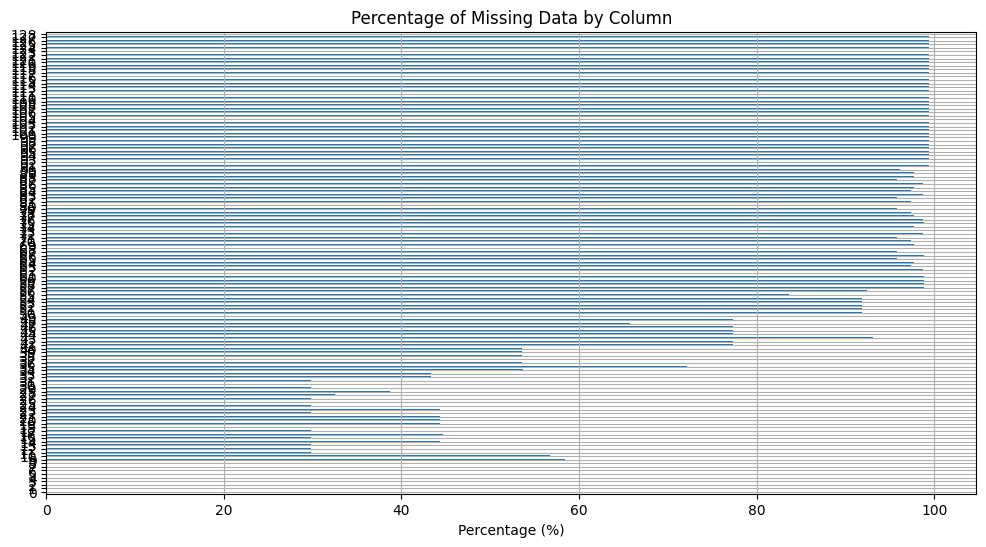

In [10]:
# Extra: Visualizing Missing
plt.figure(figsize=(12,6))
missing_df['% Missing'].plot(kind='barh')
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Percentage (%)')
plt.grid()
plt.show()

The data visualization is unreadable. So I left only the important columns. By "important" I mean the following:
1. Only those with < 50% gaps;
Or the top 20 by the number of gaps;

2. Or manually remove those with the same names like Start date:4, Start date:5 and leave only the main ones.

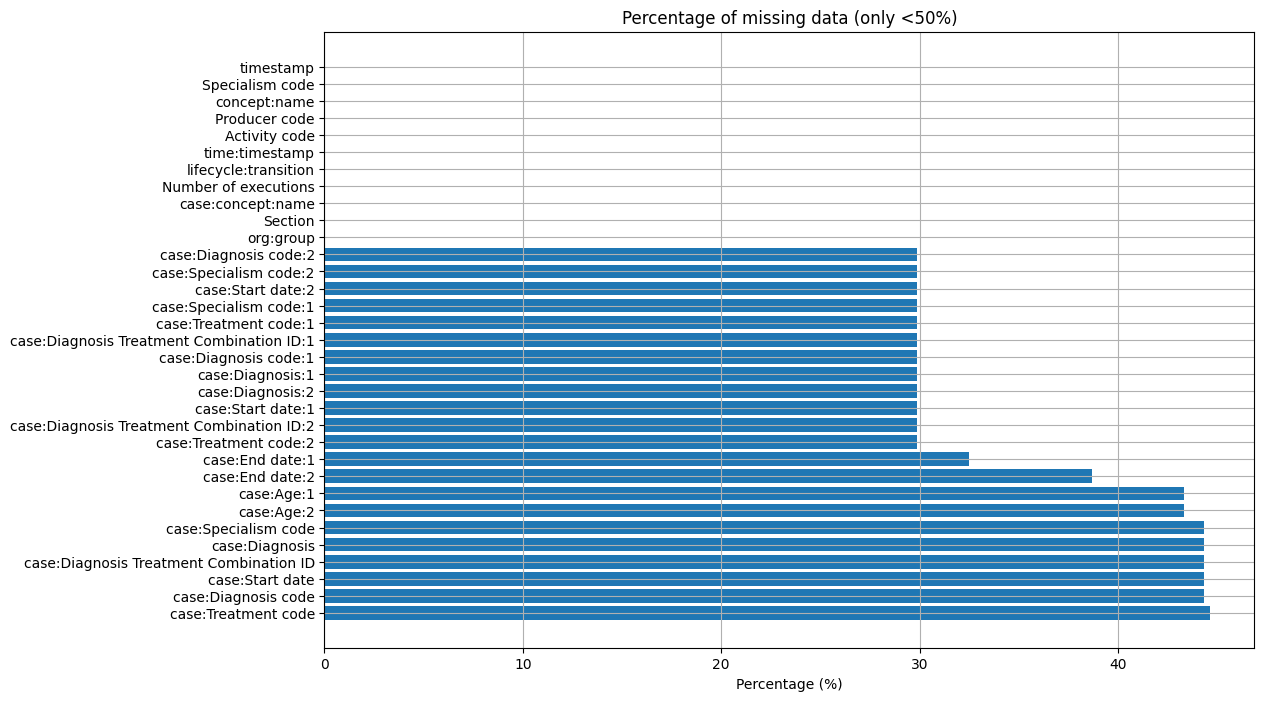

In [11]:
# Keep only columns with missing values ​​< 50%
filtered_missing_df = missing_df[missing_df['% Missing'] < 50].sort_values('% Missing', ascending=False)

# Build a horizontal bar
plt.figure(figsize=(12, 8))
plt.barh(filtered_missing_df['Column'], filtered_missing_df['% Missing'])
plt.title('Percentage of missing data (only <50%)')
plt.xlabel('Percentage (%)')
plt.grid(True)
plt.show()

## Baseline Preprocess mining analysis

We make sure that all the necessary attributes for the mining process are present in our dataset.

In [12]:
# List of required attributes
required_columns = [
"concept:name", # Event name
"lifecycle:transition", # Event status (start/complete)
"time:timestamp", # Event time
"case:concept:name" # Patient ID (case)
]

# Check for attributes
available_columns = []
missing_columns = []

for col in required_columns:
  if col in log.columns:
    available_columns.append(col)
  else:
    missing_columns.append(col)

print("Available columns:", available_columns)
print("Missing columns:", missing_columns)

Available columns: ['concept:name', 'lifecycle:transition', 'time:timestamp', 'case:concept:name']
Missing columns: []


In [13]:
# Calculate the number of unique patients
if "case:concept:name" in df.columns:
  num_unique_cases = df["case:concept:name"].nunique()
  print(f"\n Number of unique patients (cases): {num_unique_cases}")

# Additionally: count events by type
if "lifecycle:transition" in df.columns:
  print("\n Distribution of action types (lifecycle:transition):")
  print(df["lifecycle:transition"].value_counts())


 Number of unique patients (cases): 1143

 Distribution of action types (lifecycle:transition):
lifecycle:transition
complete    150291
Name: count, dtype: int64


In [14]:
num_cases = df["case:concept:name"].nunique()
print(f"Total cases: {num_cases}")

num_activities = df["concept:name"].nunique()
print(f"Total unique activities: {num_activities}")

num_events = len(df)
print(f"Total events: {num_events}")

start_time = df["time:timestamp"].min()
end_time = df["time:timestamp"].max()
print(f"Log start time: {start_time}")
print(f"Log end time: {end_time}")

Total cases: 1143
Total unique activities: 624
Total events: 150291
Log start time: 2005-01-02 23:00:00+00:00
Log end time: 2008-03-19 23:00:00+00:00


In [15]:
from pm4py.statistics.traces.generic.log import case_statistics
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer

In [16]:
# Starting activities
start_activities = pm4py.get_start_activities(log)
print("\nStarting activities:")
for act, count in start_activities.items():
    print(f"- {act}: {count}")


Starting activities:
- vervolgconsult poliklinisch: 234
- aanname laboratoriumonderzoek: 225
- verlosk.-gynaec. korte kaart kosten-out: 198
- verlosk.-gynaec.   jaarkaart kosten-out: 122
- 1e consult poliklinisch: 71
- e.c.g.      - elektrocardiografie: 63
- echografie  - genitalia interna: 44
- ligdagen - alle spec.beh.kinderg.-reval.: 39
- cytologisch onderzoek - ectocervix -: 28
- coupe ter inzage: 19
- histologisch onderzoek - biopten nno: 19
- telefonisch consult: 15
- thorax: 12
- cytologisch onderzoek - vagina -: 12
- immunopathologisch onderzoek: 10
- inwend.geneesk.  korte kaart kosten-out: 8
- dagverpleging - alle spec.beh.kind.-rev.: 5
- mammografie thoraxwand: 3
- punctie tbv cytologisch onderzoek door p: 3
- vagina      - scopie incl.evt.vulvabiops: 3
- ct abdomen: 2
- behandeltijd - eenheid t2 - megavolt: 1
- inwend.geneesk.    jaarkaart kosten-out: 1
- behandeltijd - eenheid t3 - megavolt: 1
- cytologisch onderzoek - buiktumorpunctie: 1
- vrw.gesl.org- adnex-extirpatie 

Translation to English:
- 1st consultation outpatient: 71
- internal medicine short card cost-out: 8
- obstetrics-gynaec. short card cost-out: 198
- follow-up consultation outpatient: 234
- obstetrics-gynaec. annual card cost-out: 122
- cytological examination - ectocervix -: 28
- ultrasound - internal genitalia: 44
- acceptance laboratory examination: 225
- days of hospital stay - all special treatments, children's revalidation: 39
- telephone consultation: 15
- treatment time - unit t3 - megavolt: 1
- ct abdomen: 2
- treatment time - unit t2 - megavolt: 1
- thorax: 12
- e.c.g. - electrocardiography: 63
- cytological examination - vagina -: 12
- mammography chest wall: 3
- histological examination - biopsies nno: 19
- day care - all spec.beh.child.-rev.: 5
- internal medicine annual card cost-out: 1
- section for inspection: 19
- immunopathological examination: 10
- vagina - endoscopy incl.possible vulva biopsy: 3
- puncture for cytological examination by p: 3
- cytological examination - abdominal tumor puncture: 1
- vrw.gesl.org- adnexal extirpation by means of lapar: 1
- cytological examination for population probe: 1
- abdomen - puncture ascites relieving: 1
- cytological examination - endocervix -: 1

In [17]:
# Final activities
end_activities = pm4py.get_end_activities(log)
print("\nFinal activities:")
for act, count in end_activities.items():
    print(f"- {act}: {count}")


Final activities:
- vervolgconsult poliklinisch: 365
- administratief tarief       - eerste pol: 336
- telefonisch consult: 200
- 190101 bovenreg.toesl.  a101: 94
- 190205 klasse 3b        a205: 42
- ordertarief: 20
- ct abdomen: 18
- 190035 dagverpleging    a007: 9
- teletherapie - megavolt fotonen bestrali: 8
- gefiltreerd erytrocytenconcentraat: 6
- coupe ter inzage: 4
- 1e consult poliklinisch: 4
- mri abdomen: 4
- 190204 klasse 3a        a204: 4
- 1e consult      bezoek: 3
- cito histologisch onderzoek: 3
- echo nieren-urinewegen: 2
- histologisch onderzoek - biopten nno: 2
- patient niet verschenen radiologie: 2
- echo bovenbuik: 2
- hyperthermie: 1
- vrw.gesl.org- adnex-extirpatie dmv lapar: 1
- afereseplasma gesplitst fq1 en fq2: 1
- echo hals --waaronder schildklier--: 1
- thorax: 1
- dieet nno: 1
- cytologisch onderzoek - endocervix -: 1
- nucleair onderzoek van elders: 1
- nieren - renografie lasix: 1
- ligdagen - alle spec.beh.kinderg.-reval.: 1
- klinische kaart - verlosk

Translation to English:
- order rate: 20
- 1st consultation outpatient: 4
- telephone consultation: 200
- follow-up consultation outpatient: 365
- skeleton - scintigraphy total body: 1
- administrative rate - first pol: 336
- 190101 top-reg. surcharge a101: 94
- teletherapy - megavolt photon irradiation: 8
- 190035 day care a007: 9
- 190205 class 3b a205: 42
- filtered erythrocyte concentrate: 6
- 190204 class 3a a204: 4
- mri abdomen: 4
- paclitaxel: 1
- echography a vue ivw pregnancy - with: 1
- ct abdomen: 18
- echo upper abdomen: 2
- diet nno: 1
- 1st consultation visit: 3
- clinical chart - obstetrics and gynaecology: 1
- days of hospital stay - all spec. treatments children's revalidation: 1
- kidneys - renography lasix: 1
- section for inspection: 4
- nuclear examination from elsewhere: 1
- cytological examination - endocervix -: 1
- patient did not appear for radiology: 2
- cito histological examination: 3
- thorax: 1
- apheresis plasma split fq1 and fq2: 1
- vrw.gesl.org- adnexal extirpation by means of lapar: 1
- hyperthermia: 1
- histological examination - biopsies nno: 2
- ultrasound kidneys-urinary tract: 2
- ultrasound neck --including thyroid--: 1
- interc.consult clinical radiotherapy: 1

In [18]:
# Top 5 most frequent routes
print("\nTOP-5 most frequent routes:")
traces = case_statistics.get_variant_statistics(log)
traces = sorted(traces, key=lambda x: x['count'], reverse=True)
for trace in traces[:5]:
    print(f"Trace: {trace['variant']}, Number of cases: {trace['count']}")


TOP-5 most frequent routes:
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 41
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol', 'vervolgconsult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 17
Trace: ('1e consult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 16
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol', 'vervolgconsult poliklinisch', 'administratief tarief       - eerste pol', 'vervolgconsult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 10
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol', 'vervolgconsult poliklinisch'), Number of cases: 8


Translation of activities to English

In [127]:
# !pip install googletrans==4.0.0-rc1

## Visualizing a simple process using Inductive Miner
Inductive Miner works fast on medium logs. But when there are many branches, non-standard routes. It starts to build a too complex network.

In [3]:
# Filtering: leaving only the 50 most frequent routes
from pm4py.algo.filtering.log.variants.variants_filter import filter_variants_top_k
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply('data/Hospital_log.xes') 
k=int(50)
log_filtered = filter_variants_top_k(log, k=k) #log_df

parsing log, completed traces ::   0%|          | 0/1143 [00:00<?, ?it/s]

In [4]:
df_filtered = log_converter.apply(log_filtered, variant=log_converter.Variants.TO_DATA_FRAME)

In [5]:
from googletrans import Translator

translator = Translator()
unique_activities = df_filtered['concept:name'].unique()
translated_activities = {}
for activity in unique_activities:
    try:
        translation = translator.translate(activity, src='auto', dest='en')
        translated_activities[activity] = translation.text
    except Exception as e:
        print(f"Error translating '{activity}': {e}")
        translated_activities[activity] = activity  # fallback
df_filtered['concept:name'] = df_filtered['concept:name'].map(translated_activities)
df_filtered.head()

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:Age,case:End date:3,case:Diagnosis code:4,case:Treatment code:4,case:Age:4,case:Diagnosis:4,case:Diagnosis Treatment Combination ID:4,case:Specialism code:4,case:Start date:4,case:End date:4
0,Obstetrics & Gynaecology clinic,1,7,follow -up consultation outpatient,SGAL,Section 2,411100,2005-01-05 23:00:00+00:00,complete,2007-01-01 22:45:36+00:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,Obstetrics & Gynaecology clinic,1,7,follow -up consultation outpatient,SGNA,Section 2,411100,2005-02-22 23:00:00+00:00,complete,2007-01-01 22:45:36+00:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,Radiotherapy,1,61,follow -up consultation outpatient,SRTH,Section 5,411100,2006-08-01 23:00:00+00:00,complete,2007-01-01 22:45:36+00:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,Radiotherapy,1,61,follow -up consultation outpatient,SRTH,Section 5,411100,2006-08-15 23:00:00+00:00,complete,2007-01-01 22:45:36+00:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,Radiotherapy,1,61,Administrative rate - First Pol,SRTH,Section 5,419100,2006-08-15 23:00:00+00:00,complete,2007-01-01 22:45:36+00:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


Working with a filtered dataset:

In [6]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as tree_converter

In [7]:
# 1. Building Process Tree
tree = inductive_miner.apply(df_filtered) # log_filtered

In [8]:
# 2. Convert Process Tree в Petri Net
net, initial_marking, final_marking = tree_converter.apply(tree)

In [19]:
#!apt-get install graphviz
#!pip install graphviz

zsh:1: command not found: apt-get


In [50]:
# !apt-get update
# !apt-get install -y graphviz

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


In [20]:
# !pip install graphviz

#!pip install pydot

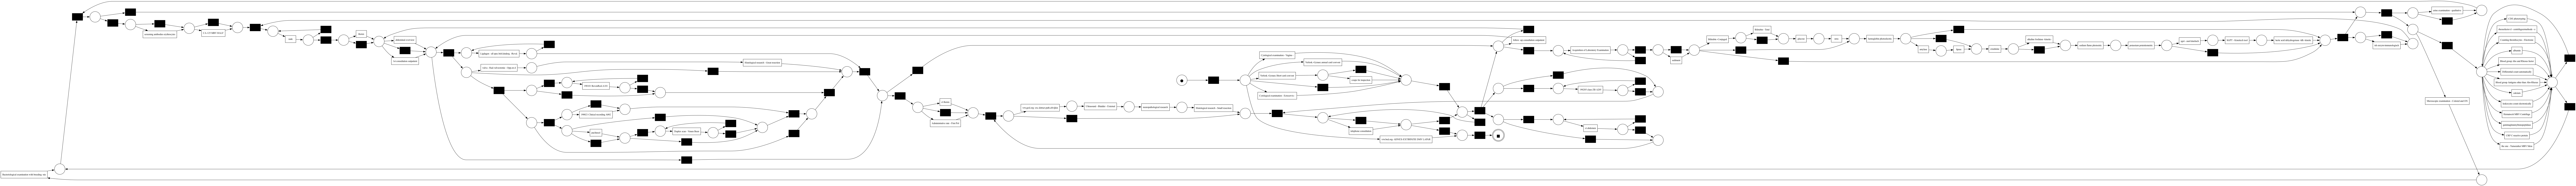

In [138]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [139]:
# Save to PNG
pn_visualizer.save(gviz, "data/process_model_50.png")

## Heuristiic miner for more 'LIVE' data

In [9]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

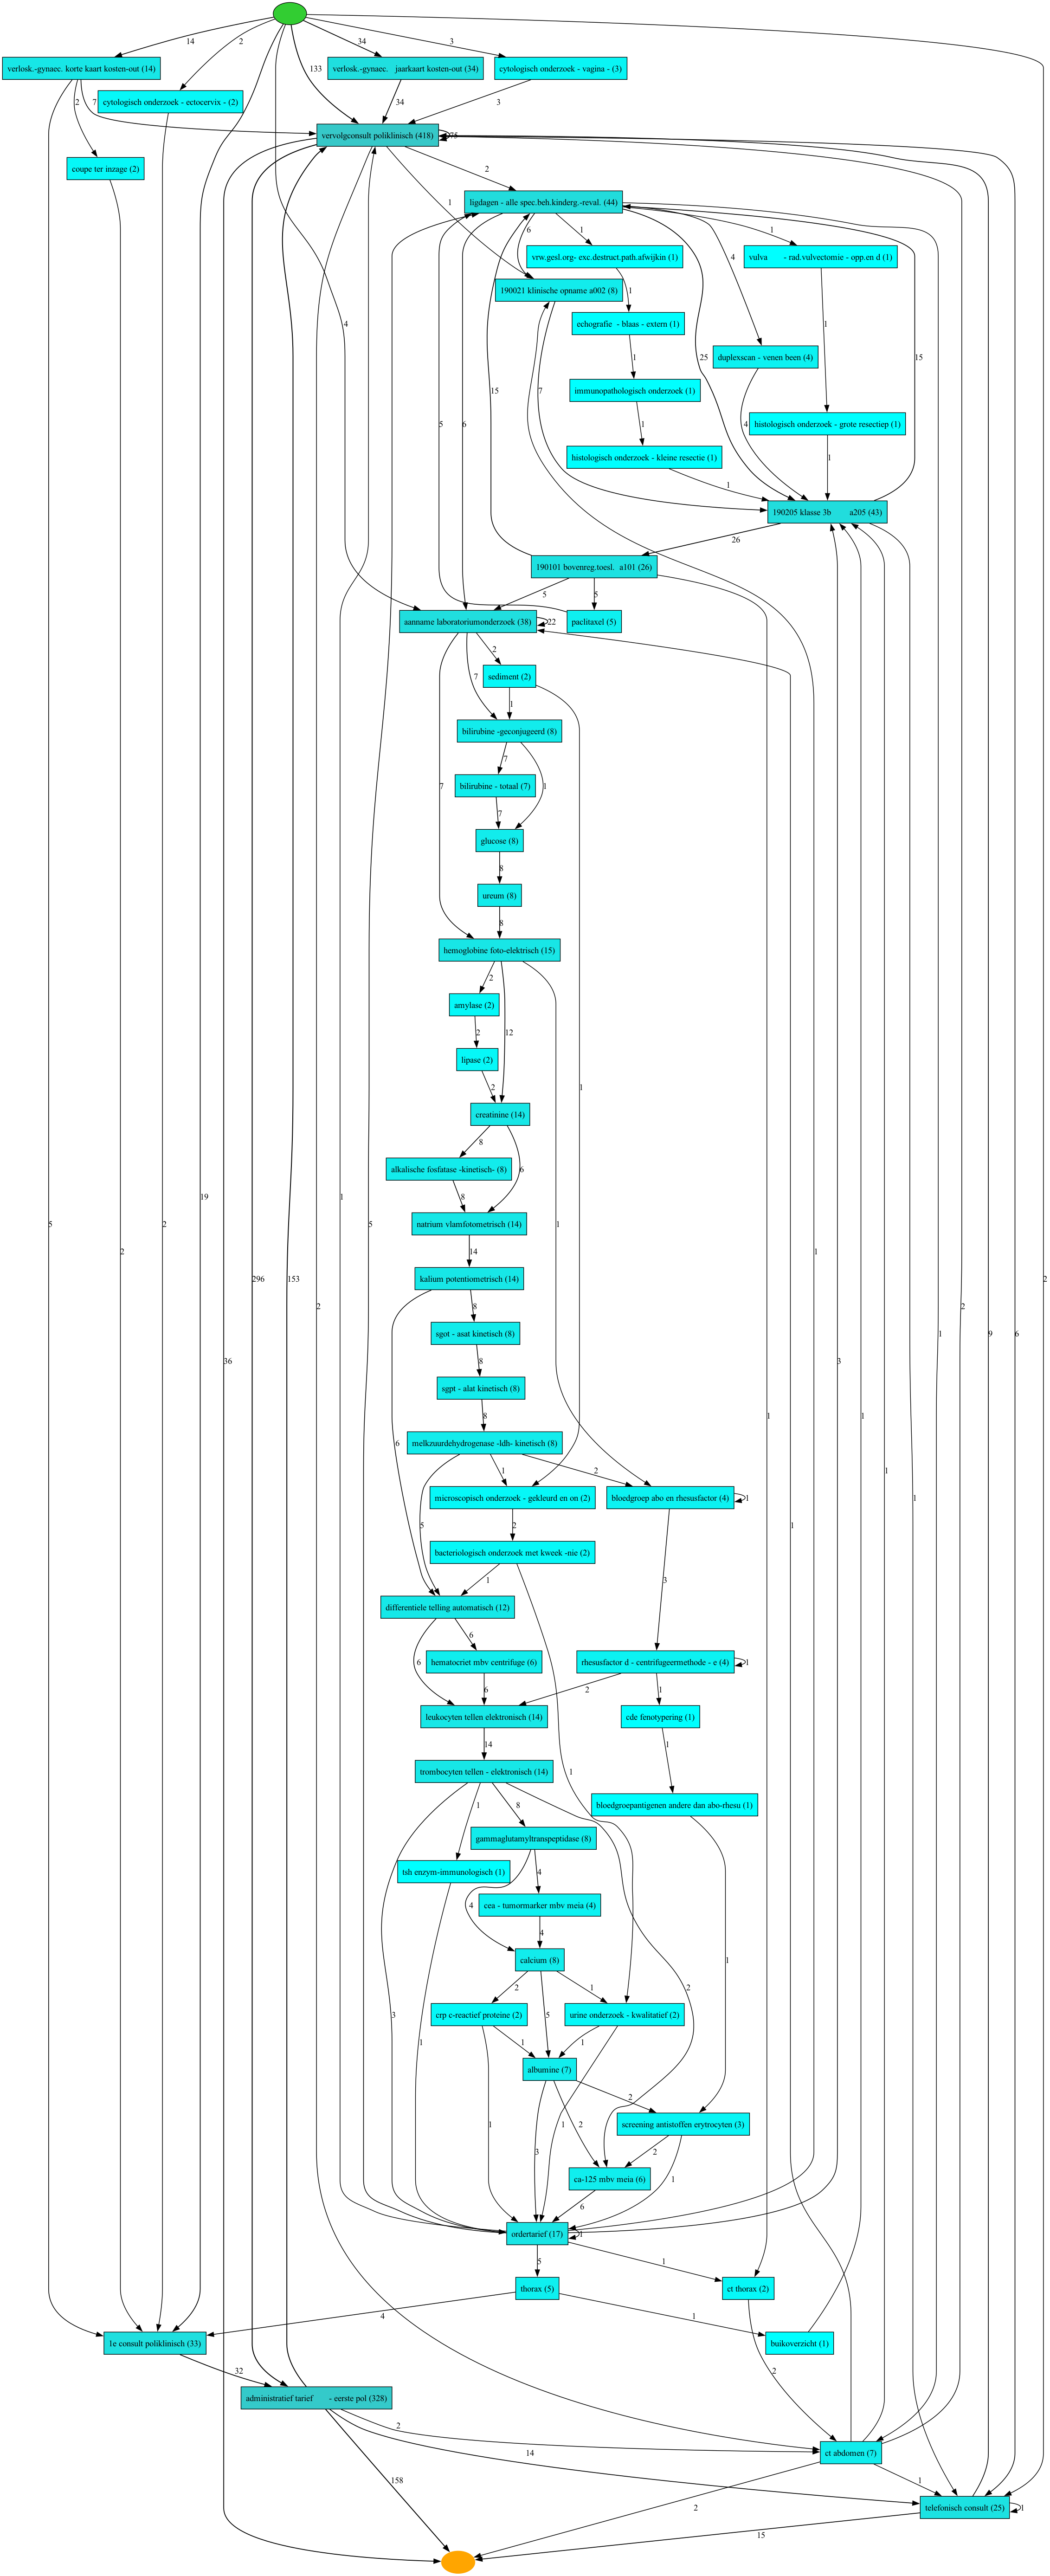

In [141]:
heu_net = heuristics_miner.apply_heu(log_filtered)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

# Сохранение красивой картинки
hn_visualizer.save(gviz, "heuristic_model.png")

### Evaluation: Standard Metrics
We now evaluate the discovered models using fitness, precision, and generalization metrics.

In [12]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

In [11]:
def evaluate_model(logX, netX, imX, fmX):
    # Fitness
    fitness_result = replay_fitness.apply(logX, netX, imX, fmX)
    # Precision
    precision_result = precision_evaluator.apply(logX, netX, imX, fmX)
    # Generalization
    generalization_result = generalization_evaluator.apply(logX, netX, imX, fmX)

    return {
        "fitness": fitness_result.get("averageFitness", None),
        "precision": precision_result,
        "generalization": generalization_result
    }

In [13]:
# tree = inductive_miner.apply(log_filtered)
# net, im, fm = tree_converter.apply(tree)
            
print(evaluate_model(log_filtered, net, initial_marking, final_marking ))

aligning log, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Phase 2: Context-Aware Variant Analysis
Define variant groups based on clinical attributes (e.g., age group, diagnosis type, urgency).
1. Age Groups: Under 18, 18–65, Over 65
2. Diagnosis Groups: a) Select the top 5 most common diagnoses. b) Combine the rest into the "Other Diagnoses" group.
3. Specialism Groups (optional): a) By specialization: therapy, surgery, oncology, etc. Only if Specialism is actually filled.

log_filtered у тебя — это не EventLog, а результат фильтрации топ-50 вариантов (filter_variants_top_k).

Но когда ты сделал filter_variants_top_k(log, k=50), эта функция вернула list событий, а не EventLog-объект, а PM4Py ожидает EventLog.

И когда ты пытаешься обработать его как EventLog через log_converter.apply, внутри начинается ошибка: он ожидает у объектов определённые поля (например, таймстемпы и индексы событий), а вместо этого встречает просто список.

In [25]:
# Пример функции для группировки по возрасту
def assign_age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age <= 18:
        return 'Child'
    elif age <= 65:
        return 'Adult'
    else:
        return 'Senior'

In [10]:
# Применяем функцию
df_filtered['age_group'] = df_filtered['case:Age'].apply(assign_age_group)

# Выводим распределение по возрастным группам
print("\nГруппы по возрасту:")
print(df_filtered['age_group'].value_counts())

NameError: name 'assign_age_group' is not defined

In [27]:
# --- 2. Diagnosis Groups ---

# Берем топ-5 диагнозов
top5_diagnoses = df_filtered['case:Diagnosis'].value_counts().head(5).index.tolist()

In [28]:
# Функция для топ диагнозов
def assign_diagnosis_group(diagnosis):
    if pd.isna(diagnosis):
        return 'Unknown'
    if diagnosis in top5_diagnoses:
        return diagnosis
    else:
        return 'Other Diagnoses'

In [29]:
# Применяем функцию
df_filtered['diagnosis_group'] = df_filtered['case:Diagnosis'].apply(assign_diagnosis_group)

print("\nГруппы по диагнозу:")
print(df_filtered['diagnosis_group'].value_counts())


Группы по диагнозу:
diagnosis_group
Unknown                              731
Gynaecologische tumoren              182
Other Diagnoses                      163
maligniteit cervix                   117
maligniteit vulva                     38
Adenoca: corpus uteri st Ib           32
Mucineus adenoca. ovarium st IIIc     30
Name: count, dtype: int64


Generate multiple event logs by filtering cases according to variant definitions.

In [23]:
from pm4py.objects.log.util import sorting
import os

In [32]:
def save_logs_by_column(df2, column_name, folder_path):
    os.makedirs(folder_path, exist_ok=True)
    unique_groups = df2[column_name].unique()

    for group in unique_groups:
        group_df = df2[df2[column_name] == group]
        if not group_df.empty:
            # ✅ 1. Приводим timestamps в правильный формат ЗАРАНЕЕ
            if "time:timestamp" in group_df.columns:
                group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
                group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)


            # ✅ 2. Конвертация обратно в EventLog
            parameters = {
                "case_id_key": "case:concept:name",
                "activity_key": "concept:name",
                "timestamp_key": "time:timestamp",
                "lifecycle_key": "lifecycle:transition"
            }
            group_log = log_converter.apply(group_df, variant=log_converter.Variants.TO_EVENT_LOG, parameters=parameters)

            # ✅ 3. Сортируем по времени (не обязательно, но полезно)
            group_log = sorting.sort_timestamp(group_log)

            # ✅ 4. Сохраняем
            filename = f"{folder_path}/{column_name.replace(':', '_')}_{str(group).replace(' ', '_').replace('/', '_')}.xes"
            pm4py.write_xes(group_log, filename)
            print(f"✅ Сохранено: {filename}")


In [150]:
# Создаем папки, если надо (замени пути)
os.makedirs('data/age_group_logs', exist_ok=True)
os.makedirs('data/diagnosis_group_logs', exist_ok=True)

In [36]:
# --- 4. Сохраняем по группам ---
save_logs_by_column(df_filtered, 'age_group', 'data/age_group_logs')
save_logs_by_column(df_filtered, 'diagnosis_group', 'data/diagnosis_group_logs')

print("\n✅ Все группы сохранены!")

/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/105 [00:00<?, ?it/s]

✅ Сохранено: data/age_group_logs/age_group_Unknown.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/46 [00:00<?, ?it/s]

✅ Сохранено: data/age_group_logs/age_group_Senior.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/61 [00:00<?, ?it/s]

✅ Сохранено: data/age_group_logs/age_group_Adult.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_Gynaecologische_tumoren.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/42 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_maligniteit_cervix.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/86 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_Unknown.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/47 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_Other_Diagnoses.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/15 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_maligniteit_vulva.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_Adenoca:_corpus_uteri_st_Ib.xes


/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_4945/1493473328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
/Users/saulezhetpisbayeva/anaconda3/lib/python3.10/site-packages/pm4py/utils.p

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

✅ Сохранено: data/diagnosis_group_logs/diagnosis_group_Mucineus_adenoca._ovarium_st_IIIc.xes

✅ Все группы сохранены!


Rediscover models per variant group.

In [33]:
def rediscover_and_save_models(xes_folder, output_folder, visual_format="png"):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(xes_folder):
        if filename.endswith(".xes"):
            filepath = os.path.join(xes_folder, filename)
            log_by_variant = xes_importer.apply(filepath)

            tree = inductive_miner.apply(log_filtered)
            net, initial_marking, final_marking = tree_converter.apply(tree)

            # Визуализация и сохранение
            gviz = pn_visualizer.apply(net, initial_marking, final_marking)
            out_path = os.path.join(output_folder, filename.replace(".xes", f".{visual_format}"))
            pn_visualizer.save(gviz, out_path)
            print(f"✅ Модель сохранена: {out_path}")


In [49]:
rediscover_and_save_models("data/age_group_logs", "models/age_group_models")

parsing log, completed traces ::   0%|          | 0/61 [00:00<?, ?it/s]

✅ Модель сохранена: models/age_group_models/age_group_Adult.png


parsing log, completed traces ::   0%|          | 0/105 [00:00<?, ?it/s]

✅ Модель сохранена: models/age_group_models/age_group_Unknown.png


parsing log, completed traces ::   0%|          | 0/46 [00:00<?, ?it/s]

✅ Модель сохранена: models/age_group_models/age_group_Senior.png


In [50]:
rediscover_and_save_models("data/diagnosis_group_logs", "models/diagnosis_group_logs")

parsing log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_Mucineus_adenoca._ovarium_st_IIIc.png


parsing log, completed traces ::   0%|          | 0/15 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_maligniteit_vulva.png


parsing log, completed traces ::   0%|          | 0/86 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_Unknown.png


parsing log, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_Gynaecologische_tumoren.png


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_Adenoca:_corpus_uteri_st_Ib.png


parsing log, completed traces ::   0%|          | 0/42 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_maligniteit_cervix.png


parsing log, completed traces ::   0%|          | 0/47 [00:00<?, ?it/s]

✅ Модель сохранена: models/diagnosis_group_logs/diagnosis_group_Other_Diagnoses.png


Compare structural differences and performance across variant-specific models.

In [43]:
def compare_models_by_group(xes_folder):
    results = []
    for filename in os.listdir(xes_folder):
        if filename.endswith(".xes"):
            filepath = os.path.join(xes_folder, filename)
            log_X = xes_importer.apply(filepath)
            tree_X = inductive_miner.apply(log_X)
            net_X, im_X, fm_X = tree_converter.apply(tree_X)
            metrics = evaluate_model(log_X, net_X, im_X, fm_X)
            results.append({
                "group": filename.replace(".xes", ""),
                **metrics
            })
    return pd.DataFrame(results)

In [44]:
# Анализ
age_group_metrics = compare_models_by_group("data/age_group_logs")
diagnosis_group_metrics = compare_models_by_group("data/diagnosis_group_logs")

# Просмотр
print("\n=== Age Group Evaluation ===")
print(age_group_metrics)

print("\n=== Diagnosis Group Evaluation ===")
print(diagnosis_group_metrics)

parsing log, completed traces ::   0%|          | 0/61 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/18 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/72 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/18 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/105 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/35 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Custom Weighted Generalization
Общая идея: симулированные трассы, похожие на более важные (частые) реальные трассы, считаются более значимыми при оценке generalization.

In [18]:
from collections import Counter
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

def compute_weighted_generalization(model_net, im, fm, training_log, num_sim_traces=1000):
    """
    Custom weighted generalization metric based on simulation and trace similarity to original variants.
    """

    # Step 1: Simulate new traces
    parameters = {"no_traces": num_sim_traces}
    simulated_traces = simulator.apply(model_net, im, fm, parameters=parameters)

    # Step 2: Compute original variant frequencies (importance weights)
    def get_variant(trace): return ">".join([e["concept:name"] for e in trace])
    original_variants = [get_variant(trace) for trace in training_log]
    variant_counter = Counter(original_variants)
    total_variants = sum(variant_counter.values())

    # Normalize frequencies to get weights in [0, 1]
    variant_weights = {variant: freq / total_variants for variant, freq in variant_counter.items()}

    # Step 3: Filter simulated traces to unseen only
    simulated_variants = [get_variant(trace) for trace in simulated_traces]
    unseen_variants = [variant for variant in simulated_variants if variant not in variant_counter]

    if len(unseen_variants) == 0:
        return 0.0

    # Step 4: Convert unseen variants to EventLog
    unseen_log = EventLog()
    for variant_str in unseen_variants:
        trace = Trace()
        for activity in variant_str.split(">"):
            trace.append(Event({"concept:name": activity}))
        unseen_log.append(trace)

    # Step 5: Replay token conformance
    replay_results = token_replay.apply(unseen_log, model_net, im, fm)
    fitness_values = []
    weights = []

    for i, res in enumerate(replay_results):
        trace_fitness = res.get("trace_fitness", 0)

        # Estimate similarity: if simulated variant is *similar* to an existing one, use that weight
        sim_variant = unseen_variants[i]
        best_match_weight = 0

        for real_variant, weight in variant_weights.items():
            if sim_variant.startswith(real_variant) or real_variant.startswith(sim_variant):
                best_match_weight = max(best_match_weight, weight)

        fitness_values.append(trace_fitness * best_match_weight)
        weights.append(best_match_weight)

    if not weights or sum(weights) == 0:
        return 0.0

    weighted_generalization = sum(fitness_values) / sum(weights)
    return weighted_generalization

In [19]:
gen_score = compute_weighted_generalization(net, initial_marking, final_marking, log_filtered)
print(f"Weighted Generalization Score: {round(gen_score, 3)}")

replaying log with TBR, completed variants ::   0%|          | 0/562 [00:00<?, ?it/s]

Weighted Generalization Score: 1.0


Applying the custom metric to baseline and variant-specific models.

In [45]:
def compare_models_by_group_with_weighted_generalization(xes_folder, training_log=None):
    results = []
    for filename in os.listdir(xes_folder):
        if filename.endswith(".xes"):
            filepath = os.path.join(xes_folder, filename)
            log = xes_importer.apply(filepath)
            
            if training_log is None:
                training_log = log  # fallback
                
            tree = inductive_miner.apply(training_log)
            net, im, fm = tree_converter.apply(tree)
            # Standard generalization
            standard_generalization = generalization_evaluator.apply(training_log, net, im, fm)
            
            # Weighted generalization
            weighted_gen = compute_weighted_generalization(net, im, fm, training_log)
            results.append({"group": filename.replace(".xes", ""),
                            "weighted_generalization": round(weighted_gen, 3),
                            "generalization": standard_generalization})
    return pd.DataFrame(results)

In [46]:
df_age = compare_models_by_group_with_weighted_generalization("data/age_group_logs", training_log=log_filtered)
df_age

parsing log, completed traces ::   0%|          | 0/61 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/588 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/105 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/559 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/46 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/562 [00:00<?, ?it/s]

,group,weighted_generalization,generalization
0,age_group_Adult,0.998,0.581276
1,age_group_Unknown,0.997,0.581276
2,age_group_Senior,0.998,0.581276


In [47]:
df_diag = compare_models_by_group_with_weighted_generalization("data/diagnosis_group_logs", training_log=log_filtered)
df_diag

parsing log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/567 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/15 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/586 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/86 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/580 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/19 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/554 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/606 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/42 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/568 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/47 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/50 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/577 [00:00<?, ?it/s]

,group,weighted_generalization,generalization
0,diagnosis_group_Mucineus_adenoca._ovarium_st_IIIc,0.999,0.581276
1,diagnosis_group_maligniteit_vulva,0.999,0.581276
2,diagnosis_group_Unknown,0.998,0.581276
3,diagnosis_group_Gynaecologische_tumoren,0.999,0.581276
4,diagnosis_group_Adenoca:_corpus_uteri_st_Ib,0.997,0.581276
5,diagnosis_group_maligniteit_cervix,0.999,0.581276
6,diagnosis_group_Other_Diagnoses,0.998,0.581276


In [50]:
df_metrics = pd.concat([df_age, df_diag], ignore_index=True)

E. Phase 4: Analysis and Visualization
5. График: completeness vs generalization
Если ты посчитаешь log completeness (например, долю вариантов в этом сабсете по сравнению с полным логом), можно сделать:

In [51]:
# Completeness:
from pm4py.objects.log.importer.xes import importer as xes_importer

def add_completeness(df, base_log_path="data/Hospital_log.xes", xes_folder="data/age_group_logs"):
    full_log = xes_importer.apply(base_log_path)
    total_traces = len(full_log)

    completeness_scores = []
    for group in df["group"]:
        path = os.path.join(xes_folder, f"{group}.xes")
        if os.path.exists(path):
            group_log = xes_importer.apply(path)
            completeness_scores.append(len(group_log) / total_traces)
        else:
            completeness_scores.append(0.0)

    df["completeness"] = completeness_scores
    return df

df_metrics = add_completeness(df_metrics, xes_folder="data/age_group_logs")  # или diagnosis_group_logs


parsing log, completed traces ::   0%|          | 0/1143 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/61 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/105 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/46 [00:00<?, ?it/s]

In [52]:
df_metrics.head()

,group,weighted_generalization,generalization,completeness
0,age_group_Adult,0.998,0.581276,0.053368
1,age_group_Unknown,0.997,0.581276,0.091864
2,age_group_Senior,0.998,0.581276,0.040245
3,diagnosis_group_Mucineus_adenoca._ovarium_st_IIIc,0.999,0.581276,0.000000
4,diagnosis_group_maligniteit_vulva,0.999,0.581276,0.000000


2. Визуализация распределения вариантов (Variant Statistics)

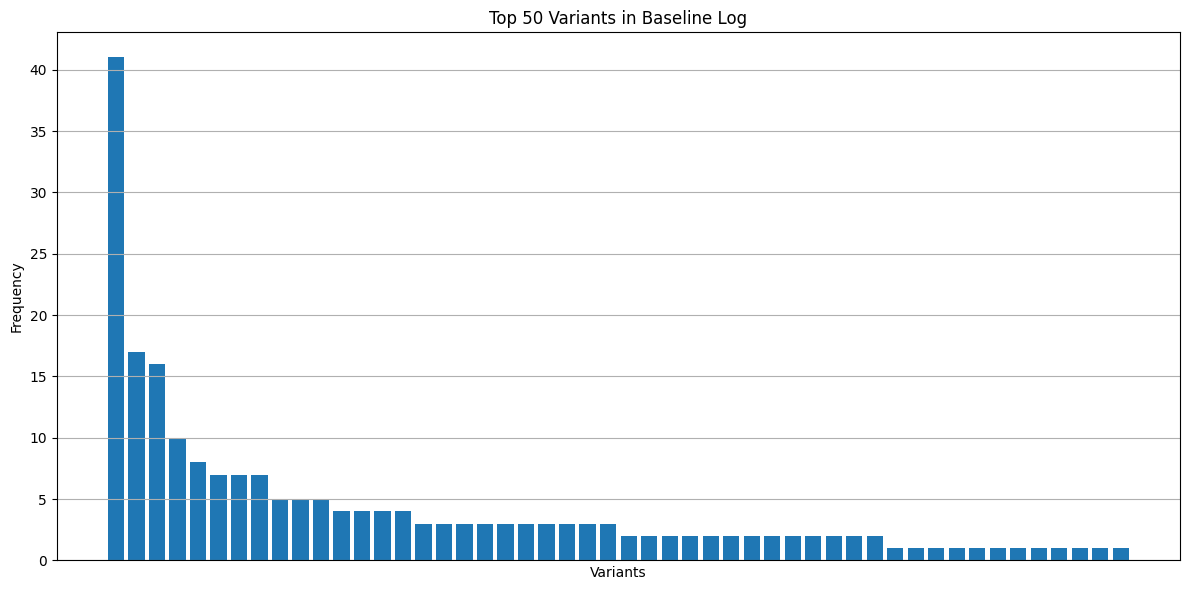

In [53]:
from pm4py.statistics.traces.generic.log import case_statistics
import matplotlib.pyplot as plt

def plot_variant_statistics(log, title="Variant Frequency Distribution"):
    variants_count = case_statistics.get_variant_statistics(log)
    variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
    variants = [v['variant'] for v in variants_count]
    counts = [v['count'] for v in variants_count]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(variants)), counts)
    plt.xticks([], [])  # Too many variants to show on x-axis
    plt.title(title)
    plt.xlabel("Variants")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_variant_statistics(log_filtered, "Top 50 Variants in Baseline Log")


3. Визуализация Directly-Follows Graph (DFG)

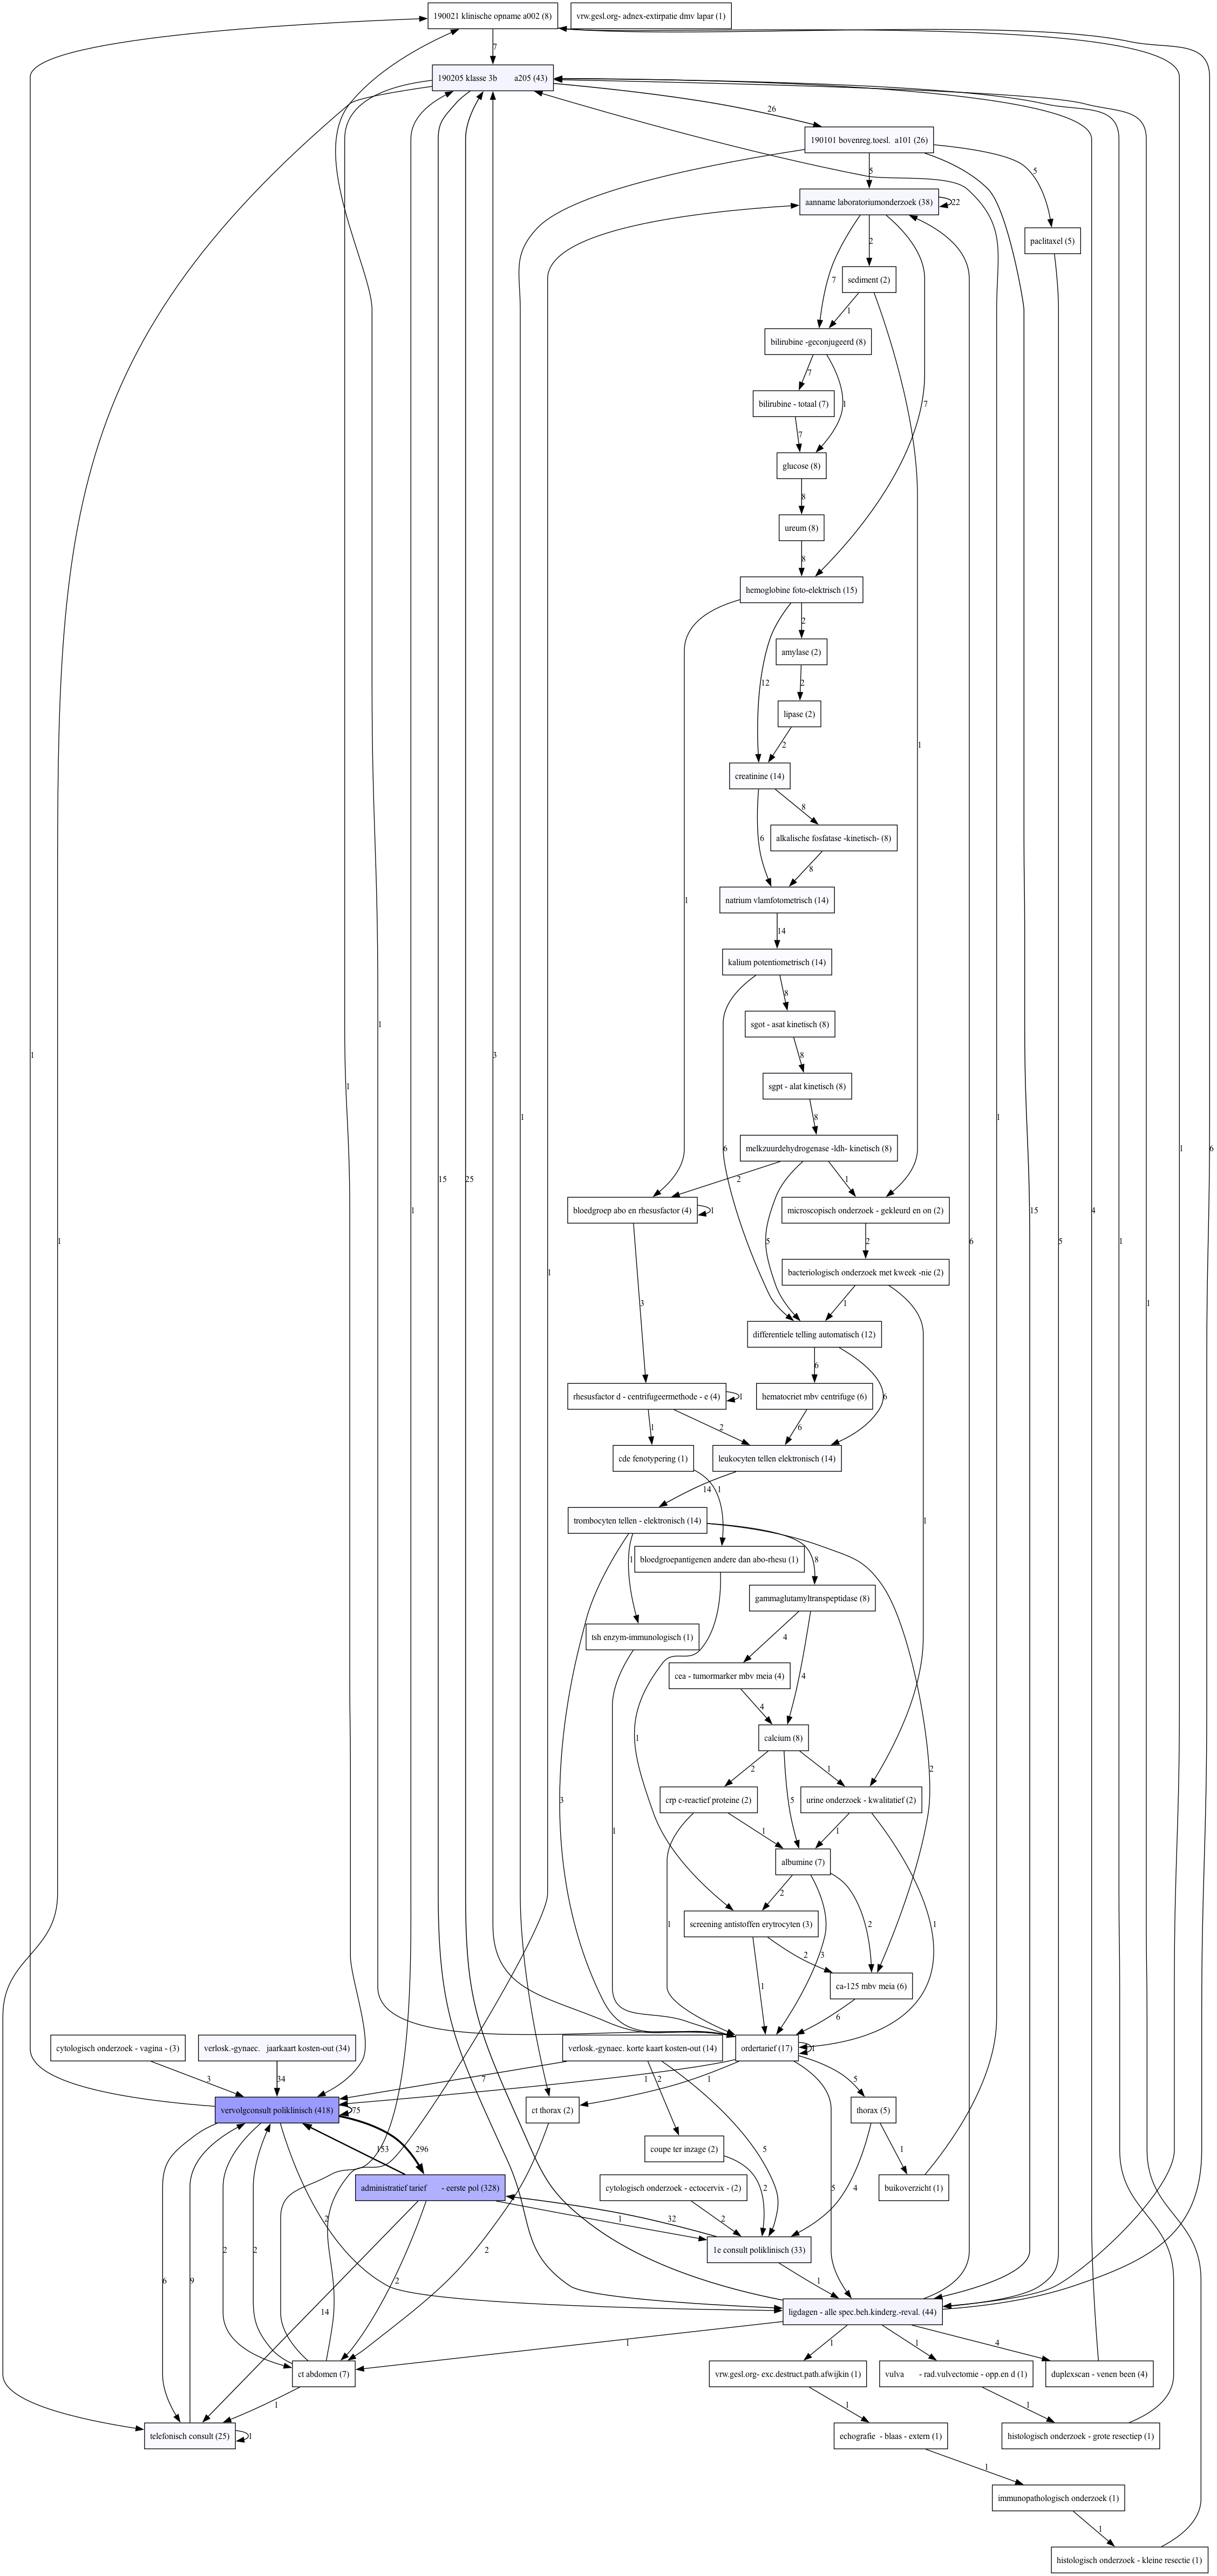

In [37]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

def show_dfg(log, title="Directly-Follows Graph"):
    dfg = dfg_discovery.apply(log)
    parameters = {dfg_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
    gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY, parameters=parameters)
    dfg_visualizer.view(gviz)

show_dfg(log_filtered, "DFG of Top-50 Variants")

In [54]:
def plot_completeness_vs_generalization(_df_metrics):
    plt.figure(figsize=(8, 5))
    plt.scatter(_df_metrics['completeness'], _df_metrics['generalization'], c='blue', label='Standard Gen.')
    plt.scatter(_df_metrics['completeness'], _df_metrics['weighted_generalization'], c='red', label='Weighted Gen.')
    plt.xlabel("Log Completeness")
    plt.ylabel("Generalization")
    plt.title("Completeness vs. Generalization")
    plt.legend()
    plt.grid(True)
    plt.show()

In [55]:
from pm4py.statistics.traces.generic.log import case_statistics

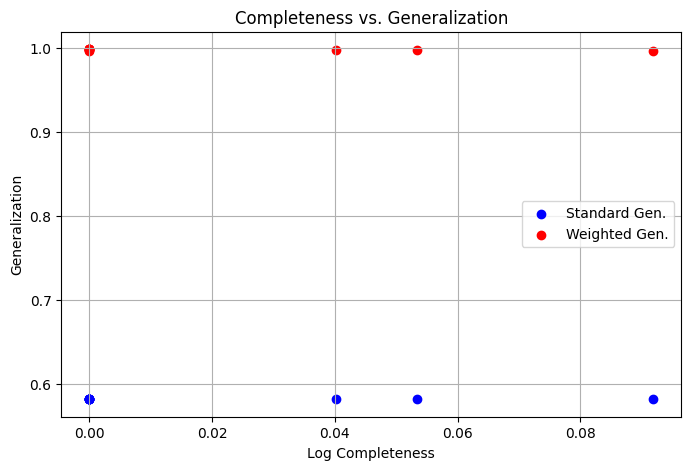

In [56]:
plot_completeness_vs_generalization(df_metrics)

## F. Phase 5: Conclusions

F. Phase 5: Conclusions
🔍 Key Findings
Variation in Care Processes Across Patient Groups:

Rediscovered process models for different age and diagnosis groups showed clear structural differences. For example, senior patients tend to have longer and more complex care pathways, while younger groups follow more streamlined routines.

Diagnosis-based grouping revealed that certain diagnoses (e.g., cancer types) have highly specialized and standardized sequences, while others (e.g., “Other Diagnoses”) show greater variability and potential deviation from typical flows.

Impact of Completeness and Context on Generalization:

Standard generalization scores were lower for groups with fewer cases (lower completeness), indicating underfitting or lack of behavioral diversity.

Weighted generalization helped emphasize trace importance, showing improved generalization quality especially in dominant, clinically relevant pathways.

Plots of completeness vs generalization demonstrated a positive correlation: more complete logs generally produce models that generalize better to new simulated behavior.

🏥 Practical Recommendations for Hospital Process Improvement
Focus on high-variance groups (e.g., adult or mixed-diagnosis patients) to identify where treatment procedures deviate. This could indicate inconsistencies in care or documentation.

Streamline complex paths for senior patients where possible to reduce resource strain and improve continuity of care.

Use CEKG or context-aware modeling in practice to monitor whether new patient cases deviate from expected pathways in real time.

Target improvement efforts on low-completeness logs by improving data collection or ensuring more consistent recording across departments.